# **Modul 2**
---

## **Evaluasi Fungsi Berdasar Bentuk Deret**

### **Latar Belakang**

Ketika suatu model matematika yang mewakili suatu sistem fisis dapat diselesaikan, pada umunya penyelesaian suatu sistem fisis tersebut berupa suatu fungsional, yaitu bentuk kompak (_closed form_) yang melibatkan bentuk fungsi tertentu. Beberapa fungsi yang terlibat dalam penyelesaian boleh jadi berbentuk sederhana sehingga dapat langsung dimanfaatkan dalam perhitungan. 

Namun, fungsi yang terlibat dalam banyak penyelesaian kajian fisis ternyata tidak memiliki bentuk sederhana. Peran metode evaluasi fungsi  menjadi penting untuk kondisi seperti ini agar perilaku atau sifat penting  bagi fungsi dapat dipahami pada rentang peubah atau _domain_ yang ditinjau dan akibatnya pemanfaatan penyelesaian bagi sistem yang melibatkan perhitungan fungsi akan dapat diperoleh. 

Ada berbagai bentuk ungkapan bagi penyelesaian suatu persoalan fisis. Salah satu ungkapan yang sering muncul adalah berupa suatu fungsi khas (*special function*). Pada umumnya, evaluasi bagi fungsi khas dapat dinyatakan dalam berbagai penyajian antara lain dalam bentuk integral, ekspansi deret pangkat, kaitan rekurensi, bentuk asimtotik serta dalam penyajian fungsi khas lainnya.

### **Ungkapan Deret**

#### 1. Evaluasi Deret bagi Fungsi Eksponen

Ditinjau penyajian deret bagi fungsi $f(x)=e^x$ yaitu

$$e^x=\sum_{n=0}^\infty\frac{1}{n!}x^n=1+\frac{1}{1!}x^1+\frac{1}{2!}x^2+\cdots+\frac{1}{n!}x^n+\cdots\tag{1}$$

$$e^{-x}=\sum_{n=0}^\infty\frac{1}{n!}x^n=1-\frac{1}{1!}x^1+\frac{1}{2!}x^2+\cdots+\frac{({-1})^n}{n!}x^n+\cdots\tag{2}$$

Bentuk wakilan deret bagi $f(x)=e^{-x}$ memerlukan perhatian dibanding bentuk $f(x)=e^x$ karena suku dalam deret yang memiliki tanda bolak-balik. Dengan bentuk seperti itu maka potensi terjadinya ralat akan lebih mungkin dibanding bentuk deret dengan suku bertanda sama. 

Contoh berikut memberikan gambaran terkait uraian tersebut. 

In [2]:
from math import factorial, exp
def fexp(x,n):
    hasil = x**0/factorial(0)
    for i in range (1,n+1):
        hasil += x**i/factorial(i)

    return hasil

In [3]:
fexp(1.2,20)

3.3201169227365472

In [4]:
exp(1.2)

3.3201169227365472

In [5]:
fexp(5.9,20)

365.037057869835

In [6]:
exp(5.9)

365.0374678653289

In [7]:
fexp(5.9,171)

*Souce-code* di atas merupakan implementasi bagi perhitungan fungsi $e^x$ berdasarkan ungkapan deret yang disajikan oleh pers (1) dan pers (2). Nampak dari implementasi tersebut bahwa perhitungan $e^{1.2}$ telah memberikan hasil yang sesuai dan teliti. 

Namun saat diambil $x=5.9$ maka hasil perhitungan hanya sesuai hingga 3 angka di belakang koma untuk deret hingga suku ke $20$. Upaya untuk meningkatkan hasil perhitungan dengan menambahkan suku orde lebih tinggi nampak tidak berhasil karena terjadi `overflow error` saat dihitung hingga suku ke $171$. Berdasar komentar hasil kompilasi menunjukkan bahwa `overflow error` bersumber dari perhitungan `factorial` akibat adanya keterbatasan penyajian bilangan bulat oleh komputer. 

Untuk mengatasi kendala tersebut maka ungkapan suku deret yang melibatkan `factorial` perlu diubah dalam bentuk kaitan rekurensi berikut.

$$s_n=\frac{1}{n!}x^n=\frac{x}{n}\times\frac{1}{(n-1)!}x^{n-1}=\frac{x}{n}\times s_{n-1}; \quad\textrm{dengan}\quad s_0=1\tag{3}$$

Dengan ungkapan tersebut maka deret pada pers (1) dan (2) berubah menjadi

$$e^x=\sum_{n=0}^\infty s_n=s_0+s_1+\cdots+s_n+\cdots\tag{4}$$

In [8]:
def fexpsn(x,n):
    sn = 1.0
    hasil = sn
    for i in range (1,n+1):
        sn *= x/i
        hasil += sn

    return hasil


In [9]:
negx = fexpsn(-5.99999,40)

In [10]:
negx

0.0024787769643157703

In [11]:
posx = fexpsn(5.99999,40)

In [12]:
negxr = exp(-5.99999)

In [13]:
posxr = exp(5.99999)

In [14]:
ralatnegx = abs((negx-negxr)/negxr)

In [15]:
ralatposx = abs((posx-posxr)/posxr)

In [16]:
ralatnegx

1.495887481320653e-12

In [17]:
ralatposx

0.0

Nampak dari hasil di atas bahwa perhitungan deret tidak menunjukkan petanda `overflow error` meskipun diambil hingga suke ke $40$. Dengan keterlibatan suku orde tinggi maka evaluasi fungsi $e^x$ dapat digunakan untuk nilai $x$ besar sebagai contoh untuk $x=-5.99999$ dan $x=5.99999$. Menggunakan hasil perhitungan pada nilai $x$ dan cacah suku yang besar ini maka dapat dilihat bahwa ralat untuk ungkapan deret positif nampak lebih teliti dibanding ungkapan deret bolak-balik.

Salah satu cara untuk meningkatkan ketelitian, maka keterlibatan bentuk deret bolak-balik dapat dihindari dengan mengubah ungkapan deret menjadi

$$e^{-x}=\frac{1}{e^x}=\frac{1}{s_0+s_1+\cdots+s_n+\cdots}\tag{3}$$

Contoh berikut menunjukkan bahwa perhitungan dengan menggunakan pers (3) yang tidak melibatkan bentuk deret bolak-balik akan dapat meningkatkan ketelitian perhitungan $f(x)=e^{-x}$, yaitu memiliki ralat perhitunmgan yang sebanding dengan perhitungan $f(x)=e^x$.

In [18]:
negx1 = 1.0/posx

In [19]:
ralatnegx1 = abs((negx1-negxr)/negxr)

In [20]:
ralatnegx1

0.0

#### 2. Evaluasi Deret bagi Fungsi Trigonometri

Berikut akan ditinjau ungkapan deret pangkat dari fungsi sederhana yaitu fungsi `sin(x)` dengan bentuk

$$\sin(x)=\sum_{n=0}^\infty\frac{(-1)^n}{(2n+1)!}x^{2n+1}=x-\frac{1}{3!}x^3+\frac{1}{5!}x^5-\cdots+\frac{(-1)^n}{(2n+1)!}x^{2n+1}+\cdots\tag{4}$$

Evaluasi deret secara langsung berdasar bentuk eksplisit deret seperti pers (4) pada umumnya tidak memberikan hasil yang teliti untuk sebarang nilai $x$. Salah satu sumber kesalahan perhitungan adalah adanya bentuk pangkat orde tinggi dalam $x$ serta bentuk faktorial yang berpotensi menghasilkan nilai yang sangat besar (`overflow error`).

Bentuk yang lebih teliti adalah dengan menghindari potensi _overflow_ dengan mengubah pers (4) ke bentuk yang setara, yaitu seperti diberikan oleh ungkapan berikut

$$\sin(x)=x\sum_{n=0}^\infty a_i=x\left(a_0+a_1 + a_2 +\cdots+a_n +\cdots\right)\tag{5}$$

dengan koefisien $a_i$ diberikan oleh kaitan rekurensi berikut

$$ a_i=-\frac{x^2}{(2i+1)2i}\,a_{i-1}; \qquad a_0=1\tag{6}$$

Dibanding pers (4), nampak bahwa bentuk pangkat orde tinggi beserta faktorial pada pers (5) menjadi tidak nampak secara eksplisit.

*Source code* berikut adalah perhitungan nilai  `sin(𝑥)`  pada sebarang  $𝑥$  berdasar implementasi ungkapan deret pers (5).

In [21]:
def fsin(x,n):
  an = 1.0
  hasil = an
  for i in range (1,n+1):
    an *= -x**2/((2.0*i+1.0)*2.0*i)
    hasil += an

  hasil *= x
  return hasil


In [22]:
from math import pi
import numpy as np
from matplotlib import pyplot as plt

In [23]:
x = np.linspace(0,2*pi,50)
y = np.zeros(50)
for i in range (50):
    xx = x[i]
    y[i] = fsin(xx,100)

yeksak = np.sin(x);

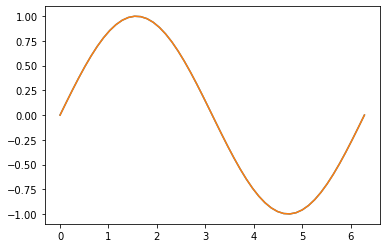

In [24]:
plt.plot(x,y)
plt.plot(x,yeksak)
plt.show()

In [25]:
x = np.linspace(10.5*pi,15.5*pi,50)
y = np.zeros(50)
for i in range (50):
    xx = x[i]
    y[i] = fsin(xx,100)

yeksak = np.sin(x);

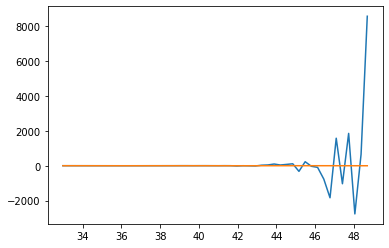

In [26]:
plt.plot(x,y)
plt.plot(x,yeksak)
plt.show()

#### 3. Evaluasi Berdasar Perilaku atau Sifat Fungsi

Meskipun ungkapan deret sperti diberikan oleh pers (5) dapat memberikan hasil yang sesuai untuk evaluasi fungsi `sin(x)` untuk $x$ kecil, namun berdasar hasil di atas nampak bahwa perhitungan fungsi tersebut  akan memberikan hasil yang menyimpang saat argumen $x$ cukup besar. Pada keadaan ini, pengambilan cacah suku deret hingga melibatkan polinom orde tinggi nampak belum dapat memberikan hasil yang dapat diterima sehingga diperlukan evaluasi fungsi yang lebih menyeluruh.

Salah satu langkah untuk melakukan evaluasi fungsi adalah dengan meninjau sifat periodik bagi fungsi `sin(x)`, yaitu nilai fungsi akan berulang ke nilai semula tiap periode $2\pi$. Salah satu sifat trigonometri yang terkait dengan hal tersebut adalah

$$\sin(x+2\pi n)=\sin(x)\cos(2\pi)+\cos(x)\sin(2\pi)=\sin(x)\tag{7}$$

Dengan sifat ini maka perhitungan nilai $\sin(x')$ pada sebarang nilai $x'$ yang besar akan dapat dihitung berdasar nilai $\sin(x)$ pada $x$ kecil, dengan $x'=x+2\pi n$. Nilai $x$ kecil tersebut dapat dipilih sedemikian hingga perhitungan berdasar evaluasi deret akan memberikan hasil yang tidak menyimpang. Dari uji coba di atas dapat ditunjukkan bahwa perhitungan fungsi `sin(x)` berdasar evaluasi deret akan memberikan hasil yang baik, dengan pengambilan cacah suku deret yang tidak  terlalu besar, ketika nilai $x$ berada pada rentang $0<x<2\pi$.

Salah satu perintah dalam *Julia* yang dapat dimanfaatkan untuk keperluan ini adalah $A\%B$ yaitu perintah untuk memperoleh nilai sisa dari proses pembagian kelipatan bilangan $B$ terhadap $A$.

*Source code* berikut adalah perhitungan nilai `sin(𝑥)` pada sebarang $x$ berdasar implementasi ungkapan deret pers (5) yang dilengkapi dengan sifat periodik fungsi `sin(x)` seperti diberikan oleh pers (7).

Dari plot berikut maka akan nampak bahwa hasil plot yang sebelumnya mengalami perbedaan pada $x$ besar, maka sekarang akan menjadi sesuai pada seluruh $x$.

In [27]:
x = np.linspace(10.5*pi,15.5*pi,50)
y = np.zeros(50)
duapi = 2.0*pi
xnew = x%duapi 
for i in range (50):
    xx = xnew[i]
    y[i] = fsin(xx,100)

yeksak = np.sin(x);

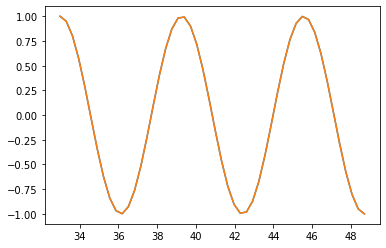

In [28]:
plt.plot(x,y)
plt.plot(x,yeksak)
plt.show()

---
## **Evaluasi Berdasar Kaitan Rekurensi**

Selain ungkapan penyajian deret, beberapa penyelesaian permasalahan fisika sering melibatkan fungsi khas (*special function*) yang disajikan dalam bentuk kaitan rekurensi. Sebagai contoh, bentuk fungsi gelombang yang merupakan penyelesaian bagi persamaan Schrodinger untuk sistem osilator harmonik dalam mekanika kuantum akan melibatkan fungsi khas yang disebut polinomial *Hermite* $H_n(x)$ berorde $n$ dalam bentuk 

$$\psi_n(x)=\frac{1}{\sqrt{2^n\,n!}}\left(\frac{m\omega}{\pi\hbar}\right)^{1/4}e^{-\frac{m\omega}{2\hbar}x^2}H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right); \quad n=0,1,2,\cdots$$
Dalam ungkapan tersebut, $m$ adalah massa benda, $\hbar=h/2$ dengan $h$ adalah tetapan Planck dan $\omega$ adalah frekuensi osilasi (lihat di tautan [Quantum Harmonic Oscillator ](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)). 

Polinomial *Hermite* $H_n(x)$ berode $n$ ([Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials)) dapat dinyatakan dalam ungkapan deret seperti berikut

$$H_n(x)=\begin{cases}
    n!\sum_{j=0}^{\frac{n}{2}}\frac{(-1)^{\frac{n}{2}-j}}{(2j)!\left(\frac{n}{2}-j\right)!}(2x)^{2j}       & \quad \text{jika } n\, \text{genap}\\
    n!\sum_{j=0}^{\frac{n-1}{2}}\frac{(-1)^{\frac{n-1}{2}-j}}{(2j+1)!\left(\frac{n-1}{2}-j\right)!}(2x)^{2j+1}  & \quad \text{jika } n\, \text{ganjil}
  \end{cases}
\tag{1}$$

atau penyajian kaitan rekurensi seperti berikut

$$H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)\tag{2}$$

Secara umum, ketika dua bentuk polinomial *Hermite* pada orde rendah diketahui yaitu $H_0(x)=1$ dan $H_1(x)=2x$, maka perhitungan polinimial *Hermite* pada sebarang peubah $x$ dan sebarang orde $n$ akan dapat diperoleh. Dengan penyajianm kaitan rekurensi, pada umumnya evaluasi fungsi relatif lebih mudah diimplementasikan l dibanding dengan penyajian ungkapan deret. 

*Source code* berikut adalah perhitungan nilai polinomial *Hermite* $H_n(𝑥)$ pada sebarang $x$ dan $n$ berdasar implementasi kaitan rekurensi pers (2).

In [29]:
from scipy import special
import numpy as np
from matplotlib import pyplot as plt

def hermiten(n,x):
    yrekur0 = 1.0
    yrekur1 = 2.0*x
    for i in range (1,n):
        yrekur = 2.0*x*yrekur1-2.0*i*yrekur0
        yrekur0 = yrekur1
        yrekur1 = yrekur
        
    return yrekur


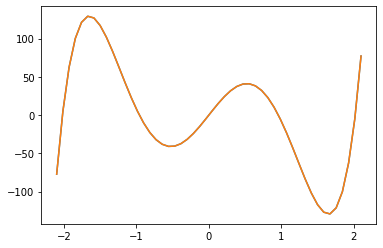

In [30]:
n = 5
x = np.linspace(-2.1, 2.1, 50)
hn = special.hermite(n)
y = hn(x)
yrekur = hermiten(n,x)
plt.plot(x,y)
plt.plot(x,yrekur)
plt.show()

## **Kendala Kaitan Rekurensi: Masalah dalam Fungsi *Bessel* Bola**

Seperti halnya *trade-off* yang muncul pada prosedur komputasi lainnya, kemudahan dalam evaluasi fungsi dengan kaitan rekurensi sebetulnya juga memiliki kendala ketika bentuk kaitan rekurensi ternyata berpotensi pada terjadinya ketakstabilan komputasi, yaitu munculnya nilai yang jauh menyimpang dibanding nilai yang seharusnya. Salah satu contoh yang sering digunakan untuk menunjukkan terjadinya ketakstabilan komputasi adalah kaitan rekuransi pada evaluasi fungsi *Bessel* (lihat pada tautan berikut [Bessel Function](https://en.wikipedia.org/wiki/Bessel_function)).  

Kaitan rekurensi bagi fungsi *Bessel* bola (*spherical Bessel*) jenis pertama yaitu $j_n(x)$ dan jenis kedua yaitu $y_n(x)$ mengambil bentuk

$$j_{n+1}(x)=\frac{2n+1}{x}j_n(x)-j_{n-1}(x)\tag{3a}$$

$$y_{n+1}(x)=\frac{2n+1}{x}y_n(x)-y_{n-1}(x)\tag{3b}$$

Sebagai pendekatan, beberapa bentuk $j_0(x), j_1(x)$ serta $y_0(x), y_1(x)$ diberikan pada [Abramowitz dan Stegun](https://en.wikipedia.org/wiki/Abramowitz_and_Stegun) seperti berikut

$$j_0(x)=\frac{\sin(x)}{x}; \quad j_1(x)=\frac{\sin(x)}{x^2}-\frac{\cos(x)}{x}\tag{4a}$$

$$y_0(x)=-\frac{\cos(x)}{x}; \quad y_1(x)=-\frac{\cos(x)}{x^2}-\frac{\sin(x)}{x}\tag{4b}$$

*Source code* berikut adalah perhitungan nilai fungsi  *Bessel* bola jenis pertama dan kedua $j_n(𝑥), y_n(x)$ pada sebarang $x$ dan $n$ berdasar implementasi kaitan rekurensi pers (3).

In [31]:
from math import sin, cos
from scipy import special
import numpy as np

def bessel1(n,x):
  j0 = sin(x)/x
  j1 = sin(x)/x**2 - cos(x)/x
  for i in range (1,n):
    jn = (2.0*i+1.0)*j1/x - j0
    j0 = j1
    j1 = jn

  return jn
  

In [32]:
n = 15
x = 2.0
jn_eksak = special.spherical_jn(n,x)
jn = bessel1(n,x)
print(jn,jn_eksak)

-3.434933153015452e-06 1.6069821659384152e-13


In [33]:
from math import sin, cos
from scipy import special
import numpy as np

def bessel2(n,x):
  y0 = -cos(x)/x
  y1 = -cos(x)/x**2 - sin(x)/x
  for i in range (1,n):
    yn = (2.0*i+1.0)*y1/x - y0
    y0 = y1
    y1 = yn

  return yn


In [34]:
n = 15
x = 2.0
yn_eksak = special.spherical_yn(n,x)
yn = bessel2(n,x)
print(yn,yn_eksak)

-101218294427.26982 -101218294427.26982


Dua implementasi kaitan rekurensi untuk perhitungan nilai fungsi  *Bessel* bola jenis pertama dan kedua $j_n(𝑥), y_n(x)$ pada sebarang $x$ dan $n$ di atas menunjukkan bahwa implementasi kaitan rekurensi pada fungsi  *Bessel* bola jenis pertama $j_n(x)$ ternyata memberikan hasil yang jauh menyimpang pada saat $n$ besar. Namun implementasi kaitan rekurensi pada fungsi  *Bessel* bola jenis kedua $y_n(x)$ ternyata memberikan hasil cukup teliti pada saat $n$ besar.

Hasil yang lebih baik pada implementasi kaitan rekurensi dapat ditempuh dengan cara yang agak unik yaitu dengan membalik proses rekurensi dari orde besar menuju pada orde kecil, yaitu dengan memulai dari nilai $j_{n+1}$ dan $j_n$ dan kemudian menerapkan kaitan rekurensi dalam bentuk

$$j_{n-1}(x)=\frac{2n+1}{x}j_n(x)-j_{n+1}(x)\tag{5}$$

Sesuai dengan sifat fungsi *Bessel* bola jenis pertama, nilai $j_{n+1}$ dan $j_n$ untuk $n$ besar akan dapat diambil pada sebarang nilai yang sangat kecil mendekati nol. 

Pada saat nilai $j_0(x)$ telah diperoleh melalui pers (5) di atas, maka dilakukan proses kalibrasi atau normalisasi agar nilai $j_0(x)$ sesuai dengan pers (4a) dengan faktor skala $k$ diberikan oleh

$$k=\frac{\frac{sin(x)}{x}}{j_0(x)}\tag{6}$$

Selanjutnya, hasil akhir $j_n(x)$ yang lebih baik akan diperoleh dengan mengalikan seluruh nilai $j_n(x)$ yang diperoleh berdasar pers (5) dengan faktor skala $k$ pada pers (6).

*Source code* berikut adalah perhitungan nilai fungsi  *Bessel* bola jenis pertama pada sebarang $x$ dan $n$ berdasar implementasi kaitan rekurensi pers (5).

In [35]:
from math import sin
from scipy import special
import numpy as np


def bessel1down(n,x):
  #jn = np.zeros(n+2)
  jn = np.zeros(26)
  #jn[n+1] = 0.0
  #jn[n] = 1.0e-14
  jn[25] = 0.0
  jn[24] = 1.0e-14
  for i in range (24,0,-1):
    jn[i-1] = (2.0*i+1.0)*jn[i]/x - jn[i+1]

  k = (sin(x)/x)/jn[0]
  jn = jn * k
  return jn[n]


In [36]:
n = 12
x = 3.875
jn_eksak = special.spherical_jn(n,x)
jn = bessel1down(n,x)
print(jn,jn_eksak)

1.0948689449873256e-06 1.094868944987327e-06


Dari hasil tersebut nampak bahwa pemanfaatan kaitan rekurensi untuk evaluasi fungsi Bessel jenis pertama ternyata memerlukan kehati-hatian karena ada potensi ketakstabilan hasil komputasi. Masalah ketakstabilan tersebut dapat dihilangkan dengan mengubah urutan rekurensi, bukan dari orde kecil ke orde besar, namun dari orde besar ke orde kecil dan kemudian dilakukan langkah kalibrasi atau normalisasi.

Berikut adalah plot dari fungsi *Bessel* bola jenis pertama pada berbagai nilai $x$ dan $n$. Nampak dari grafik berikut bahwa plot untuk ketiga perhitungan fungsi *Bessel* bola jenis pertama akan tidak nampak ada perbedaan hasil, yaitu berdasar fungsi bawaan dari modul `Scipy`, dari kaitan rekurensi pers (3a) dan dari kaitan rekurensi pers (5). Akan tetapi saat $n$ besar (mulai $n=8$ maka hasil yang sama akan diperoleh untuk perhitungan berdasar fungsi bawaan dari modul `Scipy` dan dari kaitan rekurensi pers (5). Hasil berdasar kaitan rekurensi pers (3a) nampak ada perbedaan hasil.

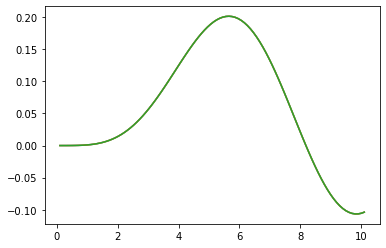

In [37]:
n = 4
x = np.linspace(0.1, 10.1, 100)
jn_eksak = special.spherical_jn(n,x)
jn_down = np.zeros(100)
jn_up = np.zeros(100)
for i in range (100):
    jn_down[i] = bessel1down(n,x[i])
    jn_up[i] = bessel1(n,x[i])
plt.plot(x,jn_eksak)
plt.plot(x,jn_down)
plt.plot(x,jn_up)
plt.show()

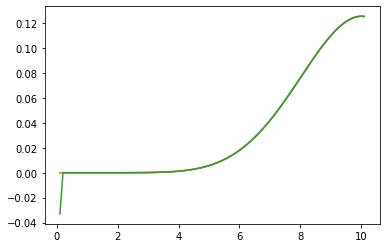

In [38]:
n = 8
x = np.linspace(0.1, 10.1, 100)
jn_eksak = special.spherical_jn(n,x)
jn_down = np.zeros(100)
jn_up = np.zeros(100)
for i in range (100):
    jn_down[i] = bessel1down(n,x[i])
    jn_up[i] = bessel1(n,x[i])
plt.plot(x,jn_eksak)
plt.plot(x,jn_down)
plt.plot(x,jn_up)
plt.show()

## **Tugas**

1. Ungkapan Deret
> * Modifikasi *source-code* untuk evaluasi fungsi `sin(x)` di atas agar dapat digunakan untuk evaluasi fungsi `sinh(x)` dengan bentuk deret diberikan oleh ungkapan
$$\sinh(x)=\sum_{n=0}^\infty\frac{1}{(2n+1)!}x^{2n+1}=x+\frac{1}{3!}x^3+\frac{1}{5!}x^5+\cdots+\frac{1}{(2n+1)!}x^{2n+1}+\cdots$$
> * Menggunakan *source-code* untuk evaluasi fungsi $e^x$, evaluasi fungsi `sinh(x)` menggunakan ungkapan berikut
$$\sinh(x)=\frac{e^x-e^{-x}}{2}$$
> * Berikan ulasan terhadap hasil evaluasi fungsi `sinh(x)` berdasar dua ungkapan di atas saat nilai $x$ sangat besar atau sangat kecil, sebagai contoh saat $x=0.2$ dan $x=8.6$.     

2. Ungkapan Kaitan Rekurensi
> * Modifikasi *source-code* untuk evaluasi polinomial *Hermite* $H_n(𝑥)$ di atas agar dapat digunakan untuk evaluasi fungsi *Hermite* $\psi_n(x)$ dengan bentuk rekurensi diberikan oleh ungkapan
$$\psi_{n+1}(x)=\sqrt{\frac{2}{n+1}}\,xH_n(x)-\sqrt{\frac{n}{n+1}}H_{n-1}(x)$$
> Fungsi *Hermite* $\psi_n(x)$ pada sebarang peubah $x$ dan sebarang orde $n$ sering muncul pada permasalahan mekanika kuantum, seperti disinggung pada uraian sebelumnya, dan dalam satuan universal dihubungkan dengan polinomial *Hermite* $H_n(x)$ melalui definisi
$$\psi_n(x)=\sqrt{\frac{1}{2^n n!\sqrt{\pi}}}e^{-\tfrac{x^2}{2}}H_n(x)$$
> * Berdasar evaluasi kaitan rekurensi di atas, tampilkan plot untuk fungsi *Hermite* $H_n(𝑥)$ saat $n=0$, $n=10$ dan $n=50$ pada rentang $x=-12$ hingga $x=12$.